In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

Create datsaets of CO$_2$ concentrations, and two logarithmic climate sensitivities as a function of those CO$_2$ concentrations. The lower sensitivity is the "transient" one, or what temperature change occurs as CO$_2$ concentrations increase. The higher sensitivity is the "equilibrium" one, after the ocean has had time to take up enough heat to stabilize its temeprature for a given CO$_2$ concentration.

In [2]:
concs = xr.DataArray(np.arange(180.,650,1), coords={'CO$_2$ concentration (ppm)':np.arange(180.,650,1)})
twoxco2 = np.abs(concs-280.*2).argmin()

temp1 = 3.*np.log(concs/280.)
temp2 = 5.*np.log(concs/280.)

nowco2 = np.abs(concs-420.).argmin()

Make a diagram of how the temperature and CO$_2$ change under zero CO$_2$ emissions, showing how CO$_2$ concentrations decrease in away that roughly cancels the increased sensitivity over time. Compare this to the case where CO$_2$ concentrations remain constant after reaching their peak, which requires continuing CO$_2$ emissions, and which leads to long-term warming.

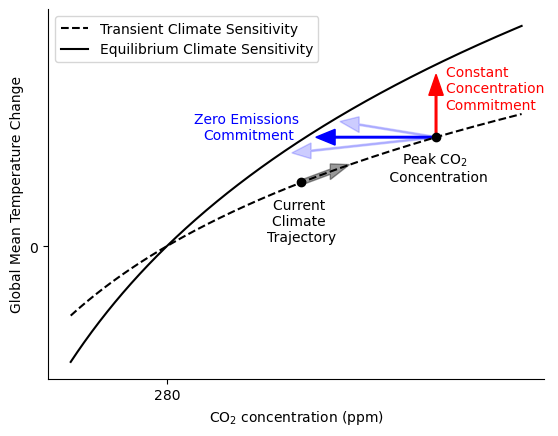

In [3]:

fig, ax = plt.subplots()
temp1.plot(color='black', linestyle='dashed', label='Transient Climate Sensitivity')
temp2.plot(color='black', linestyle='solid', label='Equilibrium Climate Sensitivity')
ax.set_yticks([0.])
ax.set_xticks([280.])
ax.set_ylabel('Global Mean Temperature Change')
plt.arrow(560,temp1[twoxco2],-125,0, color='blue', width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
plt.arrow(560,temp1[twoxco2],-100,0.3, color='blue', alpha=0.2, width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
plt.arrow(560,temp1[twoxco2],-150,-0.3, color='blue', alpha=0.2, width=0.03, head_width=0.3, head_length=20, length_includes_head=True)
plt.arrow(560,temp1[twoxco2],0,1.2, color='red', width=1.7, head_width=15, head_length=0.4, length_includes_head=True)
plt.text(560,temp1[twoxco2]-0.8, 'Peak CO$_2$ \n Concentration', ha='center',wrap=True)

plt.plot(560,temp1[twoxco2], 'o', c='black') 

plt.plot(420,temp1[nowco2], 'o', c='black') 
plt.arrow(420,temp1[nowco2],50,0.34, color='black', alpha=0.4, width=0.1, head_width=0.3, head_length=20, length_includes_head=True)
plt.text(420,temp1[nowco2]-0.3, 'Current \nClimate \nTrajectory',wrap=True, ha='center', va='top')

plt.text(570,temp1[twoxco2]+1.37, 'Constant \nConcentration \nCommitment',wrap=True, ha='left', va='top', color='red')
plt.text(365,temp1[twoxco2]+0.2, 'Zero Emissions \nCommitment',wrap=True, ha='center', va='center', color='blue')

ax.spines[['right', 'top']].set_visible(False)

plt.legend()

plt.show()

fig.savefig('zec_schematic.png',dpi=300)